In [1]:
import numpy as np
import pandas as pd

In [2]:
columns = ['center','left','right','steering','throttle','reverse','speed']
dataset = pd.read_csv('Self_Driving_Car_Assignment/driving_log.csv',names=columns)

In [3]:
dataset.head()

center  \
0  C:\Users\ZUBAIR\Desktop\Machine Learning\Deep ...   
1  C:\Users\ZUBAIR\Desktop\Machine Learning\Deep ...   
2  C:\Users\ZUBAIR\Desktop\Machine Learning\Deep ...   
3  C:\Users\ZUBAIR\Desktop\Machine Learning\Deep ...   
4  C:\Users\ZUBAIR\Desktop\Machine Learning\Deep ...   

                                                left  \
0   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...   
1   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...   
2   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...   
3   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...   
4   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...   

                                               right  steering  throttle  \
0   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...       0.0       0.0   
1   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...       0.0       0.0   
2   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...       0.0       0.0   
3   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...       0.0       0.0   
4   C:\Users\ZUBAIR\Desktop\Machine Learning\Deep...       0.0       0.0   

   reverse     speed  
0      0.0  0.000056  
1      0.0  0.000045  
2      0.0  0.000055  
3      0.0  0.000051  
4      0.0  0.000065

In [4]:
import ntpath

In [5]:
def split(path):
    head,tail = ntpath.split(path)
    return tail

In [6]:
dataset['center'] = dataset['center'].apply(split)
dataset['left'] = dataset['left'].apply(split)
dataset['right'] = dataset['right'].apply(split)

In [7]:
dataset.head()

center                              left  \
0  center_2020_10_31_03_23_56_234.jpg  left_2020_10_31_03_23_56_234.jpg   
1  center_2020_10_31_03_23_56_373.jpg  left_2020_10_31_03_23_56_373.jpg   
2  center_2020_10_31_03_23_56_476.jpg  left_2020_10_31_03_23_56_476.jpg   
3  center_2020_10_31_03_23_56_593.jpg  left_2020_10_31_03_23_56_593.jpg   
4  center_2020_10_31_03_23_56_695.jpg  left_2020_10_31_03_23_56_695.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2020_10_31_03_23_56_234.jpg       0.0       0.0      0.0  0.000056  
1  right_2020_10_31_03_23_56_373.jpg       0.0       0.0      0.0  0.000045  
2  right_2020_10_31_03_23_56_476.jpg       0.0       0.0      0.0  0.000055  
3  right_2020_10_31_03_23_56_593.jpg       0.0       0.0      0.0  0.000051  
4  right_2020_10_31_03_23_56_695.jpg       0.0       0.0      0.0  0.000065

In [8]:
import matplotlib.pyplot as plt

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


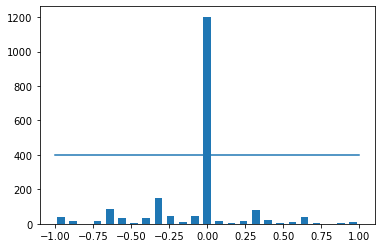

In [9]:
samples = 400
num_bins = 25
hist,bins = np.histogram(dataset['steering'],num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
print(bins)
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dataset['steering']),np.max(dataset['steering'])),(samples,samples))

In [10]:
print(len(dataset))

1889


In [11]:
from sklearn.utils import shuffle

In [12]:
rm_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(dataset['steering'])):
        if dataset['steering'][i] >= bins[j] and dataset['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples:]
    rm_list.extend(list_)

In [13]:
len(rm_list)

802

In [14]:
dataset.drop(dataset.index[rm_list],inplace=True)
print(len(dataset))

1087


<BarContainer object of 25 artists>

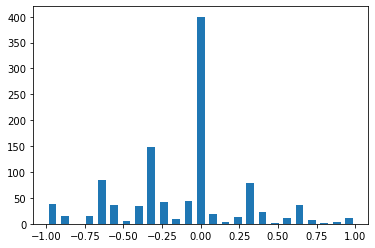

In [15]:
hist , _ = np.histogram(dataset['steering'],(num_bins))
plt.bar(center,hist,width = 0.05)

In [16]:
dataset.iloc[2]

center      center_2020_10_31_03_23_57_528.jpg
left          left_2020_10_31_03_23_57_528.jpg
right        right_2020_10_31_03_23_57_528.jpg
steering                                     0
throttle                                     0
reverse                                      0
speed                              3.95043e-05
Name: 12, dtype: object

In [17]:
import os
from os import path

In [18]:
def data_load(datadir,dataset):
    img_path = []
    steer = []
    for i in range(len(dataset)):
        index_data = dataset.iloc[i]
        center,left,right = index_data[0],index_data[1],index_data[2]
        img_path.append(os.path.join(datadir,center.strip()))
        steer.append(float(index_data[3]))
        img_path.append(os.path.join(datadir,left.strip()))
        steer.append(float(index_data[3])+0.15)
        img_path.append(os.path.join(datadir,right.strip()))
        steer.append(float(index_data[3])-0.15)
    img_path = np.asarray(img_path)
    steer = np.asarray(steer)
    return img_path , steer

In [19]:
datadir = 'Self_Driving_Car_Assignment/'

In [20]:
img_paths ,steering = data_load(datadir+'IMG/',dataset)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(img_paths,steering,test_size=0.2,random_state=6)

Text(0.5, 1.0, 'Testing Set')

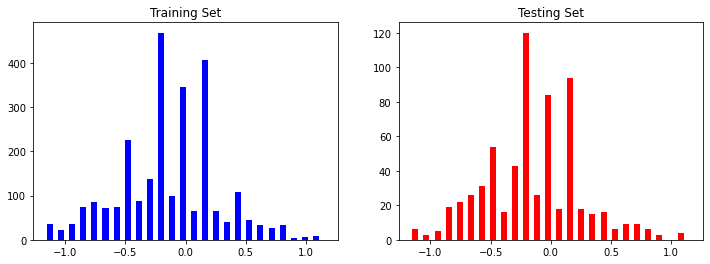

In [23]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_test,bins=num_bins,width=0.05,color='red')
axes[1].set_title('Testing Set')

In [24]:
import matplotlib.image as mpimg

In [25]:
import cv2

In [26]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:140,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img

In [27]:
image = img_paths[100]
org_img = mpimg.imread(image)
preprocess_img = img_preprocess(image)

(66, 200, 3)


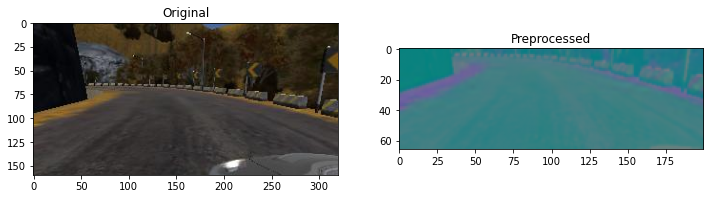

In [28]:
fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(org_img)
axes[0].set_title('Original')
axes[1].imshow(preprocess_img)
axes[1].set_title('Preprocessed')
print(preprocess_img.shape)

In [29]:
# X_train = np.array(list(map(img_preprocess,X_train)))
# X_test = np.array(list(map(img_preprocess,X_test)))

In [30]:
# history = model.fit(X_train,y_train,verbose=1,epochs=20,batch_size=200,validation_data = (X_test,y_test))

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [32]:
from imgaug import augmenters as iaa

(160, 320, 3)


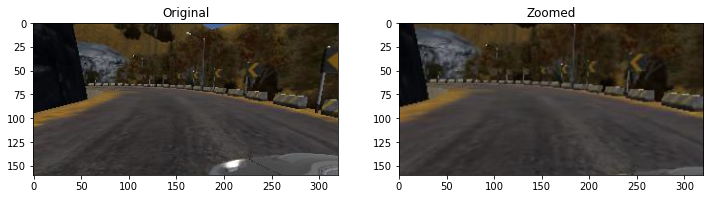

In [33]:
def zoom(img):
    zoom = iaa.Affine(scale=(1,1.3))
    img = zoom.augment_image(img)
    return img

image = img_paths[100]
org_img = mpimg.imread(image)
zoomed_img = zoom(org_img)


fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(org_img)
axes[0].set_title('Original')
axes[1].imshow(zoomed_img)
axes[1].set_title('Zoomed')
print(zoomed_img.shape)

(160, 320, 3)


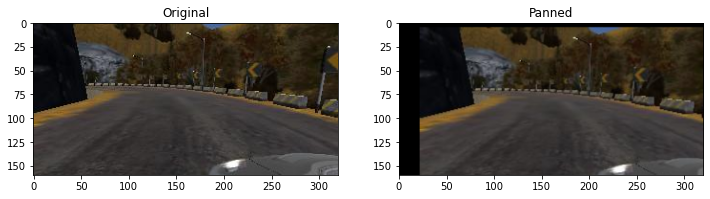

In [34]:
def pan(img):
    pan = iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
    img = pan.augment_image(img)
    return img
image = img_paths[100]
org_img = mpimg.imread(image)
pan_img = pan(org_img)


fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(org_img)
axes[0].set_title('Original')
axes[1].imshow(pan_img)
axes[1].set_title('Panned')
print(pan_img.shape)

(160, 320, 3)


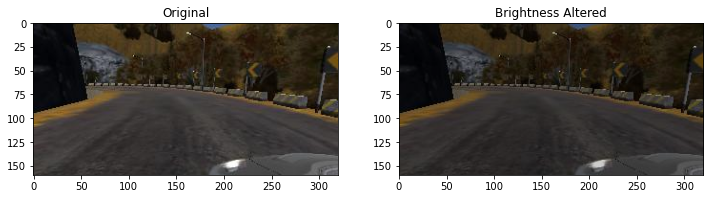

In [35]:
def img_brightness(img):
    bright = iaa.Multiply((0.2,1.2))
    img = bright.augment_image(img)
    return img

image = img_paths[100]
org_img = mpimg.imread(image)
bright_img = img_brightness(org_img)


fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(org_img)
axes[0].set_title('Original')
axes[1].imshow(bright_img)
axes[1].set_title('Brightness Altered')
print(bright_img.shape)

(160, 320, 3)


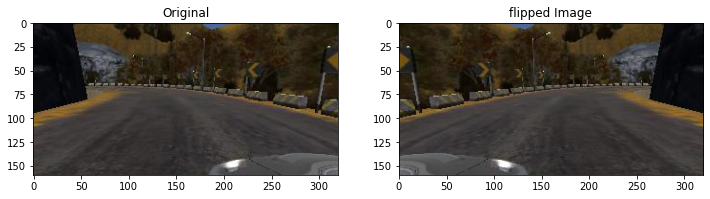

In [36]:
def flip(img,steering_angle):
    img = cv2.flip(img,1)
    steering_angle = -steering_angle
    return img,steering_angle

image = img_paths[100]
org_img = mpimg.imread(image)
steering_angle = steering[100]
flip_image,flip_steering = flip(org_img,steering_angle)


fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(org_img)
axes[0].set_title('Original')
axes[1].imshow(flip_image)
axes[1].set_title('flipped Image')
print(flip_image.shape)

In [37]:
num = np.random.rand()

In [38]:
num

0.9894840117236531

In [39]:
def random_augmentation(image,steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_brightness(image)
    if np.random.rand() < 0.5:
        image,steering_angle = flip(image,steering_angle)
    
    return image,steering_angle

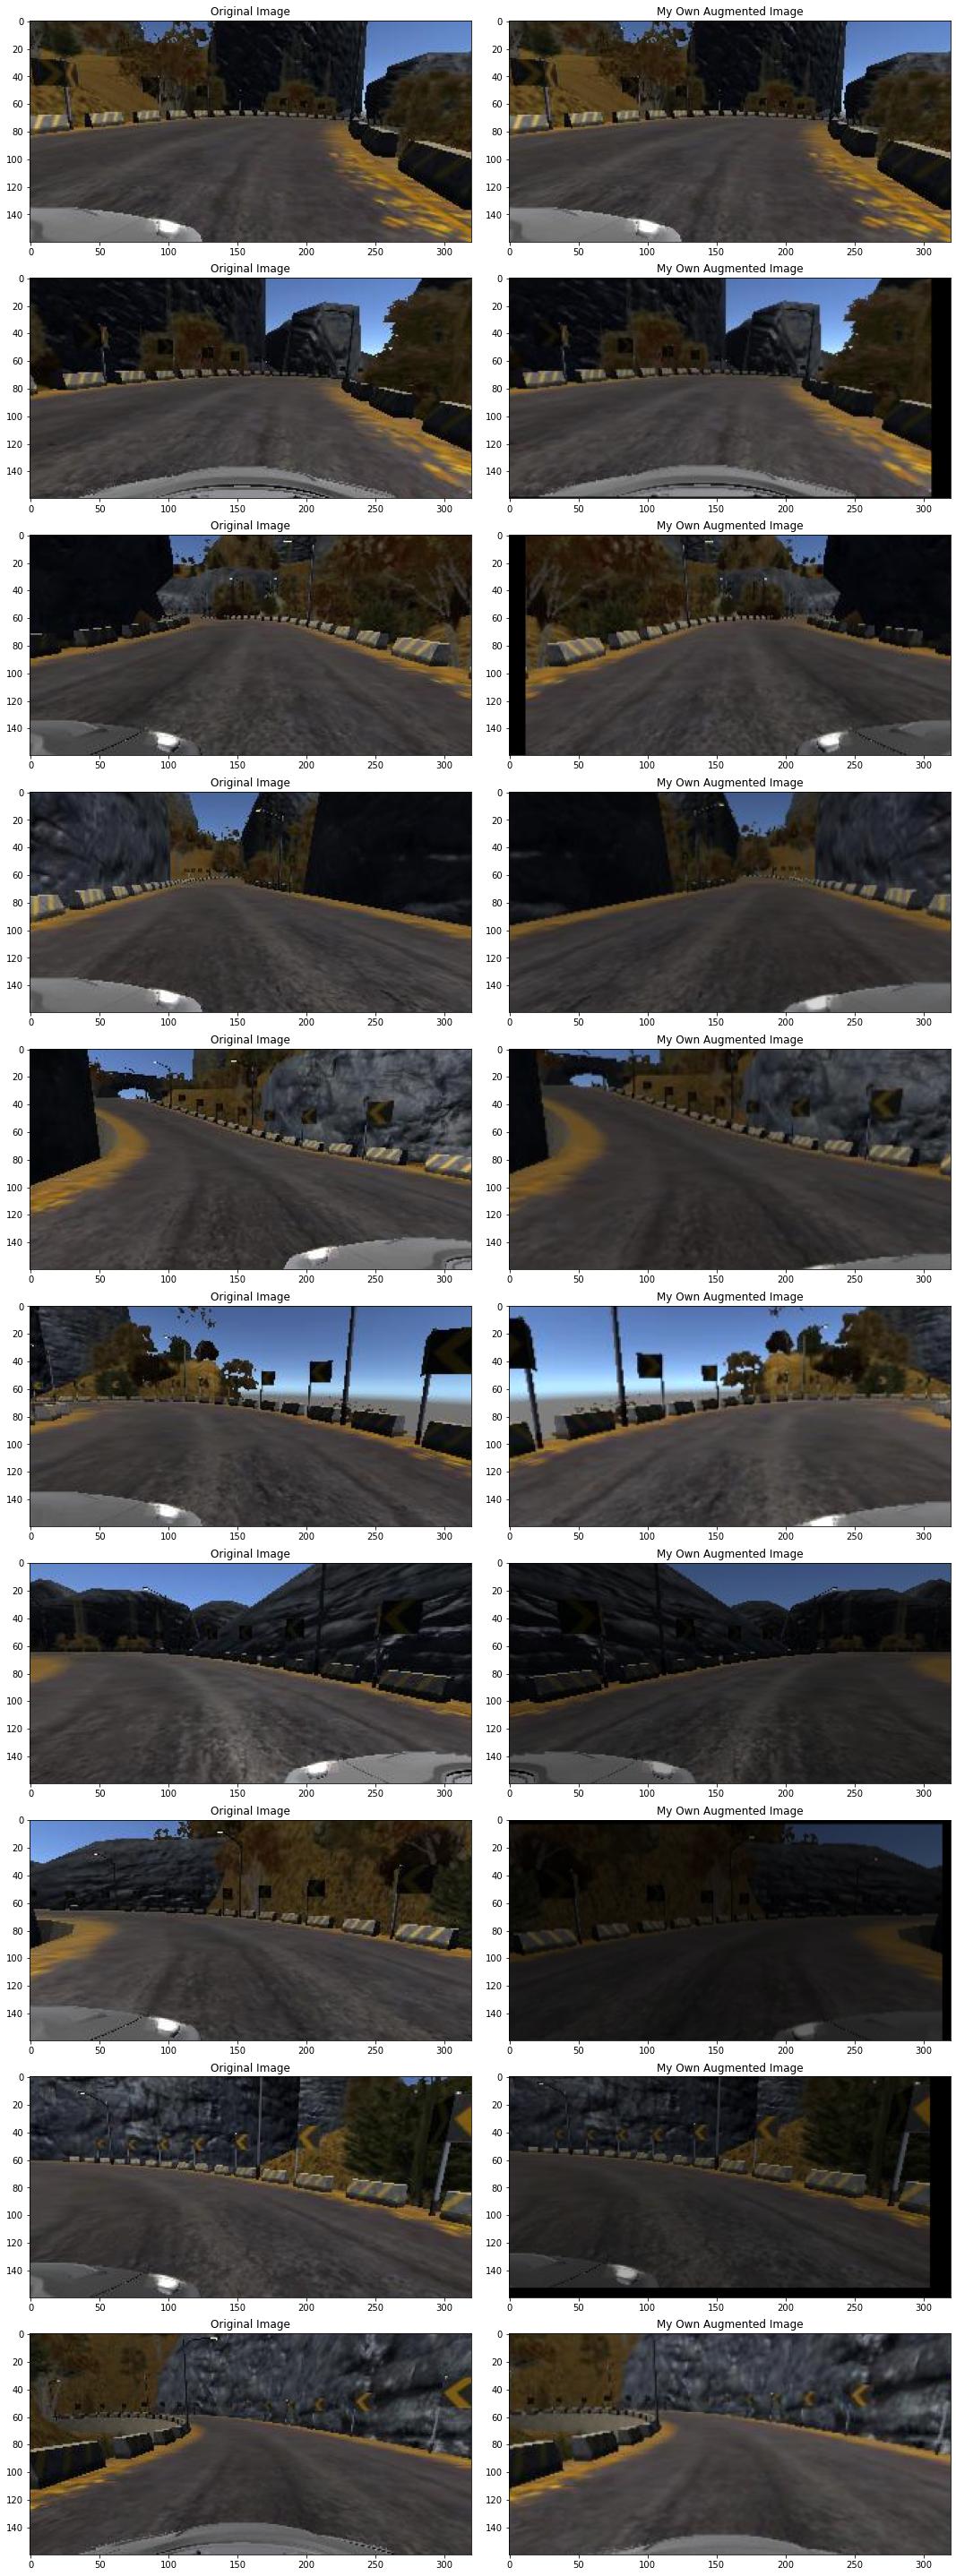

In [40]:
cols = 2
rows = 10

fig,axes = plt.subplots(rows,cols,figsize=(15,40))
fig.tight_layout()

for i in range(10):
    randnum = np.random.randint(0,len(img_paths)-1)
    random_image = img_paths[randnum]
    random_steering = steering[randnum]
    
    org_img = mpimg.imread(random_image)
    augmented_image,steering_angle = random_augmentation(random_image,random_steering)
    
    axes[i][0].imshow(org_img)
    axes[i][0].set_title('Original Image')
    
    axes[i][1].imshow(augmented_image)
    axes[i][1].set_title('My Own Augmented Image')

In [41]:
def img_preprocess2(img):
    img = img[60:140,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img

In [42]:
def batch_generator(image_paths,steering_angle,batch_size,istraining):
    while True:
        batch_image = []
        batch_steering = []
        
        for i in range(batch_size):
            random_index = np.random.randint(0,len(image_paths)-1)
            if istraining:
                img , steering = random_augmentation(image_paths[random_index],steering_angle[random_index])
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_angle[random_index]
            
            img = img_preprocess2(img)
            batch_image.append(img)
            batch_steering.append(steering)
        yield (np.asarray(batch_image),np.asarray(batch_steering))

Text(0.5, 1.0, 'Testing Image')

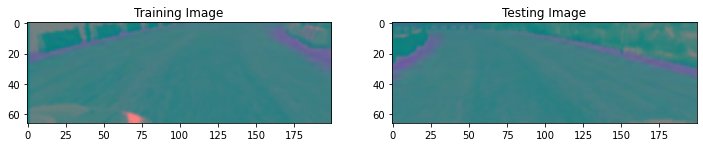

In [43]:
x_train_gen , y_train_gen = next(batch_generator(X_train,y_train,1,1))
x_valid_gen , y_valid_gen = next(batch_generator(X_test,y_test,1,0))

fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].imshow(x_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(x_valid_gen[0])
axes[1].set_title('Testing Image')

In [44]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Convolution2D,MaxPooling2D,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [55]:
def Nvidia_Model():
    model = Sequential()
    model.add(Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='elu'))

    model.add(Conv2D(36,(5,5),strides=(2,2),activation='elu'))

    model.add(Conv2D(48,(3,3),strides=(2,2),activation='elu'))

    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Conv2D(64,(3,3), activation='elu'))
    
#     model.add(Dropout(0.5))
    model.add(Flatten())
#     model.add(Dense(1164))
    model.add(Activation('elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Activation('elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('elu'))
#     model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse',optimizer = optimizer)
    
    return model
    

In [53]:
# def Nvidia_Model():
#     model = Sequential()
#     model.add(Convolution2D(24, 5, 5, strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
#     model.add(Convolution2D(36, 5, 5, strides=(2, 2), activation='elu'))
#     model.add(Convolution2D(48, 5, 5, strides=(2, 2), activation='elu'))
#     model.add(Convolution2D(64, 3, 3, activation='elu'))
  
#     model.add(Convolution2D(64, 3, 3, activation='elu'))
# #   model.add(Dropout(0.5))
  
  
#     model.add(Flatten())
  
#     model.add(Dense(100, activation = 'elu'))
# #   model.add(Dropout(0.5))
  
#     model.add(Dense(50, activation = 'elu'))
# #   model.add(Dropout(0.5))
  
#     model.add(Dense(10, activation = 'elu'))
# #   model.add(Dropout(0.5))
 
#     model.add(Dense(1))
  
#     optimizer = Adam(lr=1e-3)
#     model.compile(loss='mse', optimizer=optimizer)
#     return model

In [56]:
model = Nvidia_Model()

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 23, 48)         15600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 21, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 19, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 2432)              0         
_________________________________________________________________
activation (Activation)      (None, 2432)             

In [58]:
history = model.fit_generator(batch_generator(X_train,y_train,100,1),
                   steps_per_epoch = 300,
                   epochs=30,
                   validation_data=batch_generator(X_test,y_test,100,0),
                   validation_steps=100,
                   verbose=1,
                   shuffle=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
300/300 [==============================] - 372s 1s/step - loss: 0.2168 - val_loss: 0.1203
Epoch 2/30
300/300 [==============================] - 362s 1s/step - loss: 0.1193 - val_loss: 0.0841
Epoch 3/30
300/300 [==============================] - 365s 1s/step - loss: 0.1000 - val_loss: 0.0818
Epoch 4/30
300/300 [==============================] - 374s 1s/step - loss: 0.0920 - val_loss: 0.0821
Epoch 5/30
300/300 [==============================] - 379s 1s/step - loss: 0.0878 - val_loss: 0.0815
Epoch 6/30
300/300 [==============================] - 378s 1s/step - loss: 0.0835 - val_loss: 0.0791
Epoch 7/30
300/300 [==============================] - 377s 1s/step - loss: 0.0830 - val_loss: 0.0864
Epoch 8/30
300/300 [==============================] - 375s 1s/step - loss: 0.0805 - val_loss: 0.0743
Epoch 9/30
300/300 [==============================] - 375s 1s/step - loss: 0.0801 - val_loss: 0.0742
Epoch 10/30
300

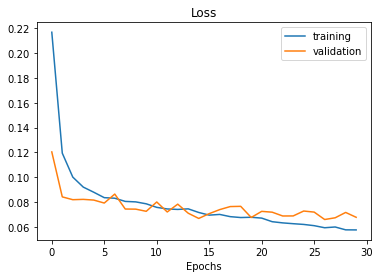

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epochs')
model.save('DriveCar2.h5')